

# Trying Out Different Learning Acronyms

## ADEPT

- A:= analogy
- D:= diagram
- E:= example
- P:= plain english
- T:= technical definition

> This still needs a bridge into what the person cares about. So teachiing some formalization technique or trick to bring that person's interests into the problem/concept

In [3]:
# import os

# # Set OPENAI API Key

# os.environ["OPENAI_API_KEY"] = "your openai key"

# OR (load from .env file)

# from dotenv import load_dotenv
# load_dotenv("./.env")

In [1]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnableParallel
from langchain_openai import ChatOpenAI

def chain_analogy(llm): 
    return ChatPromptTemplate.from_template("Write a simple analogy for this concept: '''{concept}''', which should perfectly encapsulate\
        what it is.") | llm

def chain_diagram(llm):
    return ChatPromptTemplate.from_template("Write a knowledge graph with the necessary concepts and elements to understand the following concept: '''{concept}''', this diagram should perfectly encapsulate\
        what it is and what it relates to.") | llm

def chain_example(llm):
    return ChatPromptTemplate.from_template("Write down five examples that perfectly demonstrate this concept: '''{concept}'''. ") | llm


def chain_plain_english(llm):
    return ChatPromptTemplate.from_template("Write a plain english definition for this concept: '''{concept}'''") | llm


def chain_technical_definition(llm):
    return ChatPromptTemplate.from_template("Write a short and precise technical definition for this concept: '''{concept}'''") | llm


llm_chat = ChatOpenAI()

analogy_chain = chain_analogy(llm_chat)
diagram_chain = chain_diagram(llm_chat)
example_chain = chain_example(llm_chat)
plain_english_chain = chain_plain_english(llm_chat)
technical_definition_chain = chain_technical_definition(llm_chat)


concept = "joint probability mass function"
map_chain = RunnableParallel(analogy=analogy_chain, diagram=diagram_chain, example=example_chain, 
                             plain_english=plain_english_chain, technical_def=technical_definition_chain)
output_explanation = map_chain.invoke({"concept": concept})
output_explanation

{'analogy': AIMessage(content='A joint probability mass function is like a recipe that tells you the chances of two ingredients coming together in a dish, determining the overall probability of a successful outcome.'),
 'diagram': AIMessage(content='**Concept: Joint Probability Mass Function**\n\n- **Definition**: A joint probability mass function (PMF) is a function that gives the probability that two discrete random variables X and Y take on specific values x and y simultaneously.\n\n- **Related Concepts**:\n  - **Probability Mass Function (PMF)**: A function that gives the probability that a discrete random variable takes on a specific value.\n  - **Random Variables**: Variables that can take on different values based on the outcome of a random event.\n  - **Marginal Probability**: The probability of an event occurring for a single random variable in a joint distribution.\n  - **Conditional Probability**: The probability of an event occurring given that another event has already occ

In [2]:
from IPython.display import Markdown, display


for key in output_explanation.keys():
    display(Markdown(f"**{key}**\n\n{output_explanation[key].content}\n\n"))

**analogy**

A joint probability mass function is like a recipe that tells you the chances of two ingredients coming together in a dish, determining the overall probability of a successful outcome.



**diagram**

**Concept: Joint Probability Mass Function**

- **Definition**: A joint probability mass function (PMF) is a function that gives the probability that two discrete random variables X and Y take on specific values x and y simultaneously.

- **Related Concepts**:
  - **Probability Mass Function (PMF)**: A function that gives the probability that a discrete random variable takes on a specific value.
  - **Random Variables**: Variables that can take on different values based on the outcome of a random event.
  - **Marginal Probability**: The probability of an event occurring for a single random variable in a joint distribution.
  - **Conditional Probability**: The probability of an event occurring given that another event has already occurred.

- **Uses**:
  - Joint PMFs are used to model the relationship between two or more random variables and can be used to calculate various probabilities and make predictions.

- **Formula**:
  - P(X=x, Y=y) = P(X=x ∩ Y=y)

- **Example**:
  - If X represents the number of heads when flipping two coins and Y represents the number of tails, the joint PMF would give the probabilities of getting 0, 1, or 2 heads and tails.

- **Notation**:
  - P(X=x, Y=y) or P(X,Y)(x,y)

- **Properties**:
  - Joint PMFs must satisfy the properties of probability, i.e., they must be non-negative and sum to 1 over all possible values of X and Y.

- **Applications**:
  - Used in fields such as statistics, machine learning, and decision theory to model and analyze the relationships between multiple random variables.



**example**

1. Rolling a fair six-sided die twice and calculating the probability of getting a 1 on the first roll and a 2 on the second roll.
2. Choosing a card from a standard deck of 52 cards twice and calculating the probability of drawing a red card followed by a face card.
3. Flipping a fair coin three times and calculating the probability of getting heads on the first two flips and tails on the third flip.
4. Selecting two marbles from a bag containing 3 red marbles and 2 blue marbles without replacement, and calculating the probability of selecting a red marble followed by a blue marble.
5. Choosing two numbers at random from the set {1, 2, 3, 4, 5} and calculating the probability of selecting 1 and then selecting an odd number.



**plain_english**

A joint probability mass function is a mathematical function that shows the likelihood of two or more random variables occurring together in a set of data.



**technical_def**

A joint probability mass function is a mathematical function that assigns probabilities to combinations of values for multiple random variables in a discrete probability distribution.



Ok, this is nice but can we make it better? Like the knowledge graph is not visual, how can we improve upon that? 

In [20]:
# !pip install --upgrade pydantic

In [5]:
# !pip install graphviz

In [6]:
# from pydantic import BaseModel, Field
from langchain.pydantic_v1 import BaseModel, Field
from typing import List
from graphviz import Digraph
import argparse
from langchain.output_parsers import PydanticOutputParser
import graphviz
from IPython.display import display

class Node(BaseModel):
    id: int
    label: str
    color: str

class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str = "black"

class KnowledgeGraph(BaseModel):
    """A knowledge graph is a graph that represents knowledge as a set of entities and relations between them."""
    nodes: List[Node] = Field(..., description="A list of nodes in the knowledge graph")
    edges: List[Edge] = Field(..., description="A list of edges in the knowledge graph")


def visualize_knowledge_graph(kg: KnowledgeGraph):
    dot = Digraph(comment="Knowledge Graph")

    # Add nodes
    for node in kg.nodes:
        dot.node(str(node.id), node.label, color=node.color)

    # Add edges
    for edge in kg.edges:
        dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

    # Render the graph
    display(graphviz.Source(dot.source))

Now, let's modify the `chain_diagram()` function to output a schema that's appropriate for generating a knowledge graph.

In [16]:
from langchain.utils.openai_functions import convert_pydantic_to_openai_function
openai_function_knowledge_graph = convert_pydantic_to_openai_function(KnowledgeGraph)

llm_chat = ChatOpenAI()    
llm_with_tools = llm_chat.bind(functions=[openai_function_knowledge_graph])

chain = chain_diagram(llm_with_tools)
concept = "large language models"

output_graph = chain.invoke({"concept": concept})
output_graph

AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{"nodes":[{"id":1,"label":"Large Language Models","color":"#FF5733"},{"id":2,"label":"Artificial Intelligence","color":"#FFC300"},{"id":3,"label":"Natural Language Processing","color":"#C70039"}],"edges":[{"source":1,"target":2,"label":"is a type of"},{"source":1,"target":3,"label":"applies to"}]}', 'name': 'KnowledgeGraph'}})

Ok, so we are getting the right output, which we can access like this:

In [17]:
output_graph.additional_kwargs["function_call"]["arguments"]

'{"nodes":[{"id":1,"label":"Large Language Models","color":"#FF5733"},{"id":2,"label":"Artificial Intelligence","color":"#FFC300"},{"id":3,"label":"Natural Language Processing","color":"#C70039"}],"edges":[{"source":1,"target":2,"label":"is a type of"},{"source":1,"target":3,"label":"applies to"}]}'

But we want this output to be perfectly tailored for a function that visualizes the graph, so let's do that. 

In [18]:
from langchain.output_parsers import PydanticOutputParser

pydantic_output_parser = PydanticOutputParser(pydantic_object=KnowledgeGraph)

output_graph_json_dict = output_graph.additional_kwargs["function_call"]["arguments"]
output_graph_json_dict 

'{"nodes":[{"id":1,"label":"Large Language Models","color":"#FF5733"},{"id":2,"label":"Artificial Intelligence","color":"#FFC300"},{"id":3,"label":"Natural Language Processing","color":"#C70039"}],"edges":[{"source":1,"target":2,"label":"is a type of"},{"source":1,"target":3,"label":"applies to"}]}'

In [19]:
pydantic_output_parser.parse(output_graph_json_dict)

KnowledgeGraph(nodes=[Node(id=1, label='Large Language Models', color='#FF5733'), Node(id=2, label='Artificial Intelligence', color='#FFC300'), Node(id=3, label='Natural Language Processing', color='#C70039')], edges=[Edge(source=1, target=2, label='is a type of', color='black'), Edge(source=1, target=3, label='applies to', color='black')])

Yay! As you can see above, the output of parsing with the pydantic_output_parser is the `KnowledgeGraph` object, which we can feed into the 
`visualize_graph` function to get the final output.

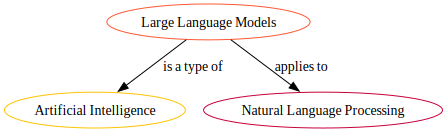

In [20]:
kg = pydantic_output_parser.parse(output_graph_json_dict)

visualize_knowledge_graph(kg)

Yaaay victory!!! Now, let's wrap this into a modified version of the original chain by using the RunnableLambda Object to do the 
intermediary step we were doing before.

In [15]:
from langchain.utils.openai_functions import convert_pydantic_to_openai_function
from langchain.schema.runnable import RunnableLambda


def chain_diagram_viz():
    """Full chain to generate the formatted knowledge graph"""
    openai_function_knowledge_graph = convert_pydantic_to_openai_function(KnowledgeGraph)
    llm_chat = ChatOpenAI(model="gpt-4-turbo")    
    llm_with_tools = llm_chat.bind(functions=[openai_function_knowledge_graph])
    pydantic_output_parser = PydanticOutputParser(pydantic_object=KnowledgeGraph)
    return ChatPromptTemplate.from_template("Write a knowledge graph with the necessary concepts and elements to understand the following concept: '''{concept}''', this diagram should perfectly encapsulate\
        what it is and what it relates to.") | llm_with_tools | RunnableLambda(lambda x: x.additional_kwargs["function_call"]["arguments"]) | pydantic_output_parser
    # Here instead of using the RunnableLambda we could have used the JsonOutputFunctionsParser, however langchain and pydantic had some compatibility issues
    # so we're extracting the json dict manually and then parsing it with the PydanticOutputParser 
concept = "artificial neural network" 
output_graph = chain_diagram_viz().invoke({"concept": concept})
visualize_knowledge_graph(output_graph)

TokenError: ('EOF in multi-line statement', (7, 0))

Nice! How about we put everything together under a class that represents this LangChain implementation of the ADEPT method?

In [21]:
from dataclasses import dataclass
from typing import Any
from langchain.prompts import ChatPromptTemplate
from langchain.schema.runnable import RunnableParallel
from langchain.chat_models import ChatOpenAI

@dataclass
class ADEPT:
    concept: str
    llm_chat = ChatOpenAI()
    
    def chain_analogy(self):
        return ChatPromptTemplate.from_template("Write a simple analogy for this concept: '''{concept}''', which should perfectly encapsulate\
            what it is.") | llm_chat

    
    def chain_diagram_viz(self):
        """Full chain to generate the formatted knowledge graph"""
        openai_function_knowledge_graph = convert_pydantic_to_openai_function(KnowledgeGraph) 
        llm_with_tools = llm_chat.bind(functions=[openai_function_knowledge_graph])
        pydantic_output_parser = PydanticOutputParser(pydantic_object=KnowledgeGraph)
        return ChatPromptTemplate.from_template("Write a knowledge graph with the necessary concepts and elements to understand the following concept: '''{concept}''', this diagram should perfectly encapsulate\
            what it is and what it relates to.") | llm_with_tools | RunnableLambda(lambda x: x.additional_kwargs["function_call"]["arguments"]) | pydantic_output_parser
        

    def chain_example(self):
        return ChatPromptTemplate.from_template("Write down five examples that perfectly demonstrate this concept: '''{concept}'''. ") | llm_chat


    def chain_plain_english(self):
        return ChatPromptTemplate.from_template("Write a plain english definition for this concept: '''{concept}'''") | llm_chat


    def chain_technical_definition(self):
        return ChatPromptTemplate.from_template("Write a short and precise technical definition for this concept: '''{concept}'''") | llm_chat
    
    def visualize_knowledge_graph(self, kg: KnowledgeGraph):
        dot = Digraph(comment="Knowledge Graph")

        # Add nodes
        for node in kg.nodes:
            dot.node(str(node.id), node.label, color=node.color)

        # Add edges
        for edge in kg.edges:
            dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)

        # Render the graph
        display(graphviz.Source(dot.source))
        
    # now let's write a __call__ method that runs all of the chains and generates a nice output just from the concept input.
    def __call__(self):
        analogy_chain = self.chain_analogy()
        diagram_chain = self.chain_diagram_viz()
        example_chain = self.chain_example()
        plain_english_chain = self.chain_plain_english()
        technical_definition_chain = self.chain_technical_definition()
        map_chain = RunnableParallel(analogy=analogy_chain, diagram=diagram_chain, example=example_chain, 
                             plain_english=plain_english_chain, technical_def=technical_definition_chain)
        output_explanation = map_chain.invoke({"concept": self.concept})
        return output_explanation


/Users/greatmaster/miniconda3/envs/oreilly-langchain/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [22]:
concept = "langchain python library"

adept = ADEPT(concept)
adept

ADEPT(concept='langchain python library')

In [23]:
output_explanation = adept()

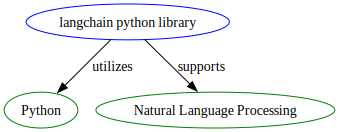

In [24]:
diagram = output_explanation["diagram"]

adept.visualize_knowledge_graph(diagram)

In [25]:
output_explanation["analogy"].content

'The langchain python library is like a Swiss Army knife for language processing, providing all the tools you need in one convenient package.'

In [26]:
output_explanation["example"].content

'1. Using langchain python library to tokenize and analyze text data for natural language processing tasks.\n2. Implementing sentiment analysis with langchain python library to classify text as positive, negative, or neutral.\n3. Creating a language model with langchain python library to generate realistic text based on input data.\n4. Extracting key phrases and entities from text using langchain python library for information retrieval tasks.\n5. Building a chatbot using langchain python library to interact with users in a conversational manner.'

In [27]:
output_explanation["plain_english"].content

'The langchain python library is a software tool that helps developers work with blockchain technology using the Python programming language.'

In [28]:
output_explanation["technical_def"].content

'The langchain python library is a software tool that provides a set of functions and utilities for interacting with the Langchain protocol and conducting language-based blockchain operations in Python programming language.'